<a href="https://colab.research.google.com/github/Neeraton/Scanning-the-Earth-s-Surface-for-Water-Bodies/blob/main/neer_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 37.4 MB/s eta 0:00:00


This command installs the Rasterio library using pip, which is a package manager for Python. It allows you to install Python packages from the Python Package Index (PyPI).

In [2]:
import rasterio
import numpy as np
import cv2
import matplotlib.pyplot as plt

import rasterio: This imports the Rasterio library for working with geospatial raster data.

import numpy as np: This imports the NumPy library, a fundamental package for numerical computing with Python. It's often imported with the alias np to make it easier to reference in the code.

import cv2: This imports the OpenCV library, which is a popular computer vision library that provides tools for image processing and computer vision algorithms.

import matplotlib.pyplot as plt: This imports the pyplot submodule from the Matplotlib library, which is a plotting library for Python. The alias plt is commonly used to reference the pyplot module.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# StepStep 1: Read satellite imagery
with rasterio.open('/content/drive/MyDrive/Neer/X_test.tif') as src:
    # Read different bands from the satellite image
    nir_band = src.read(4)  # Near-infrared band (indexing starts from 1)
    green_band = src.read(3)  # Green band
    blue_band = src.read(2)  # Blue band
    red_band = src.read(1)  # Red band



This block of code reads a multispectral satellite image from a GeoTIFF file named 'X_test.tif'.
It reads different bands (e.g., NIR, green, blue, and red) from the satellite image using Rasterio's src.read() method.

(np.float64(-0.5), np.float64(2508.5), np.float64(1676.5), np.float64(-0.5))

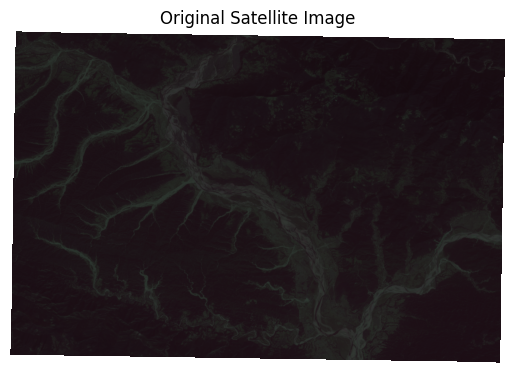

In [7]:
plt.imshow(np.dstack((red_band, green_band, blue_band)))
plt.title('Original Satellite Image')
plt.axis('off')

This code block displays the original satellite image by stacking the individual bands (red, green, and blue) using NumPy's np.dstack() function.
Matplotlib's imshow() function is used to display the image, plt.title() sets the title of the plot, and plt.axis('off') removes the axis labels.

(np.float64(-0.5), np.float64(2508.5), np.float64(1676.5), np.float64(-0.5))

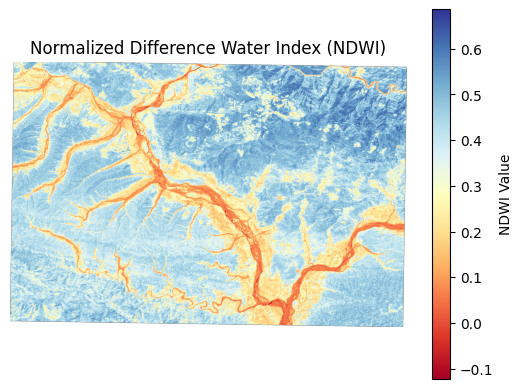

In [8]:
# Step 2: Compute NDWI (Normalized Difference Water Index)
ndwi = np.where((nir_band + green_band) == 0., 0, (nir_band - green_band) / (nir_band + green_band))

plt.imshow(ndwi, cmap='RdYlBu')
plt.title('Normalized Difference Water Index (NDWI)')
plt.colorbar(label='NDWI Value')
plt.axis('off')

Here, NDWI (Normalized Difference Water Index) is computed using the near-infrared (NIR) and green bands.
NDWI is a measure of water content in remote sensing imagery. The formula (NIR - Green) / (NIR + Green) calculates the NDWI values.
NumPy's np.where() function is used to handle division by zero.

This block of code displays the NDWI image using Matplotlib. cmap='RdYlBu' sets the color map for visualization.
plt.colorbar() adds a color bar to the plot, and plt.axis('off') removes the axis labels.

In [9]:
# Step 3: Thresholding
threshold = 0.1
water_mask = np.where(ndwi > threshold, 1, 0)

Here, a threshold value is set to distinguish water from non-water areas.
Pixels with NDWI values above the threshold are classified as water, and pixels below the threshold are classified as non-water.
The resulting binary mask is stored in water_mask.

(np.float64(-0.5), np.float64(2508.5), np.float64(1676.5), np.float64(-0.5))

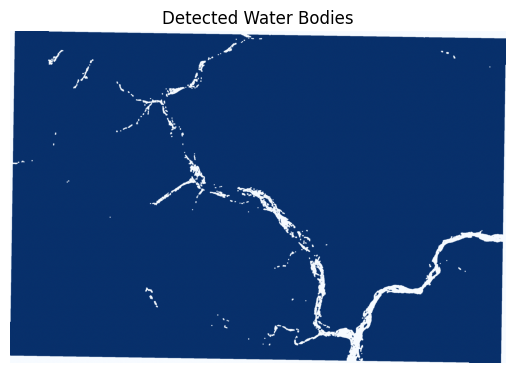

In [10]:
# Step 4: Post-processing (Optional)
kernel = np.ones((5, 5), np.uint8)
water_mask = cv2.morphologyEx(water_mask.astype(np.uint8), cv2.MORPH_CLOSE, kernel)

plt.imshow(water_mask, cmap='Blues')
plt.title('Detected Water Bodies')
plt.axis('off')

This block performs post-processing on the water mask using morphological operations.
It applies a closing operation to fill in small gaps and smooth the boundaries of the detected water bodies.



(np.float64(-0.5), np.float64(2508.5), np.float64(1676.5), np.float64(-0.5))

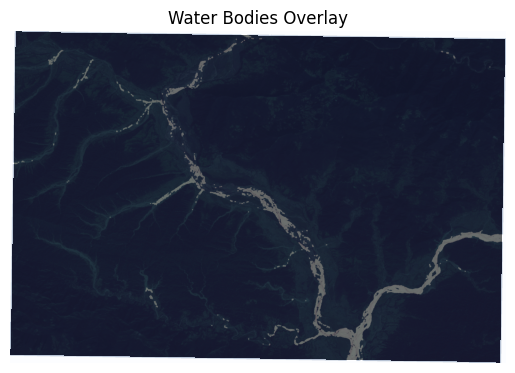

In [11]:
# Step 5:Overlay the water mask on the original image
plt.imshow(np.dstack((red_band, green_band, blue_band)))
plt.imshow(water_mask, cmap='Blues', alpha=0.3)  # Overlay water mask with transparency
plt.title('Water Bodies Overlay')
plt.axis('off')

Finally, this block overlays the water mask on the original satellite image to visualize the detected water bodies.
The alpha parameter controls the transparency of the overlay.